# <center style='color:navy'>`Support Vector Machine (SVM)` using Scikit-Learn</center>

# 1. Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# 2. Load `mushrooms` dataset

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('mushrooms.csv', sep=',')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.shape

(8124, 23)

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# 3. Perform preprocessing

In [8]:
labelencoder = LabelEncoder()
for i in df.columns:
    df[i] = labelencoder.fit_transform(df[i])

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

# 4. Separate features and labels

In [11]:
X = df.drop(['veil-type', 'class'], axis=1)
y = df['class']

# 5. Split the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5686, 2438, 5686, 2438)

# 6. Apply `SVM`

In [14]:
svm = SVC(C=0.2, kernel='poly', degree=2, gamma='auto', random_state=1)
svm.fit(X_train, y_train)

SVC(C=0.2, degree=2, gamma='auto', kernel='poly', random_state=1)

In [15]:
print(f'Accuracy on the test set: {round(svm.score(X_test, y_test), 4)}')

Accuracy on the test set: 0.9971


# 7. Plot `confusion_matrix`

In [16]:
y_pred = svm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=svm.classes_)

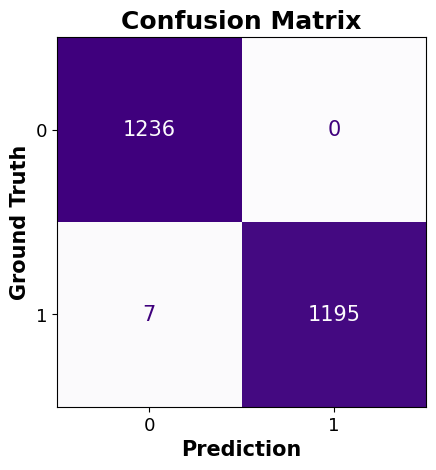

In [17]:
disp.plot(cmap='Purples', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [18]:
cat_labels = ['edible', 'poisonous']
y_pred = svm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)

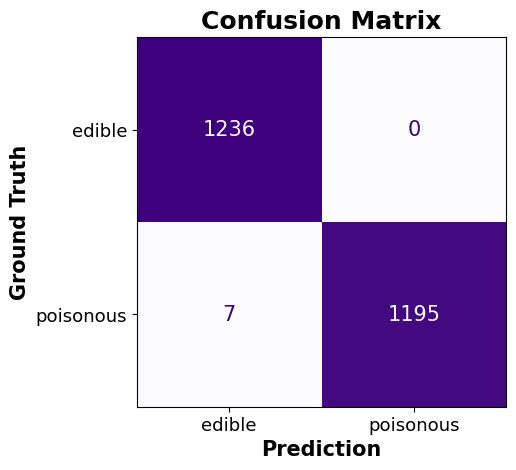

In [19]:
disp.plot(cmap='Purples', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [20]:
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', round(metrics.recall_score(y_test, y_pred), 4))

Accuracy: 0.9971
Precision: 1.0
Recall: 0.9942


# 8. Print `classification_report`

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1236
           1       1.00      0.99      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# 9. Random prediction

In [22]:
random_data = [[2, 3, 9, 0, 8, 1, 0, 1, 11, 0, 3, 2, 3, 8, 7, 3, 2, 4, 6, 4, 5]]
random_data = pd.DataFrame(random_data, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                                   'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root',
                                   'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                                   'stalk-color-below-ring', 'veil-color', 'ring-number',
                                   'ring-type', 'spore-print-color', 'population', 'habitat'])

In [23]:
random_pred = svm.predict(random_data)
if random_pred == 0:
    print('edible')
else:
    print('poisonous')

poisonous


In [24]:
random_pred # poisonous

array([1])